In [ ]:
!pip install kaggle

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:01<00:00, 156MB/s]
100% 163M/163M [00:01<00:00, 150MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls


data  face-mask-dataset.zip  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1399.jpg', 'with_mask_519.jpg', 'with_mask_3127.jpg', 'with_mask_1047.jpg', 'with_mask_3571.jpg']
['with_mask_1302.jpg', 'with_mask_2540.jpg', 'with_mask_1496.jpg', 'with_mask_1927.jpg', 'with_mask_430.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3577.jpg', 'without_mask_3014.jpg', 'without_mask_1572.jpg', 'without_mask_3119.jpg', 'without_mask_2051.jpg']
['without_mask_823.jpg', 'without_mask_202.jpg', 'without_mask_1839.jpg', 'without_mask_3412.jpg', 'without_mask_3644.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828



with mask --> 1

without mask --> 0

In [ ]:

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


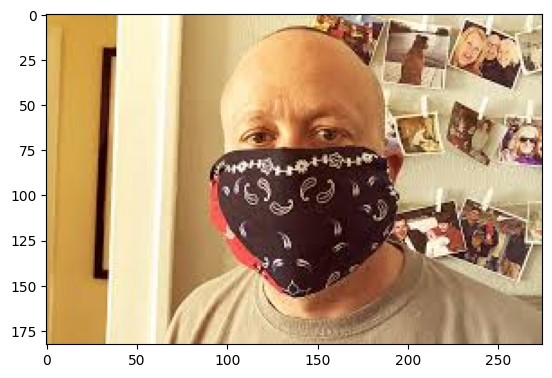

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3688.jpg')
imgplot = plt.imshow(img)
plt.show()

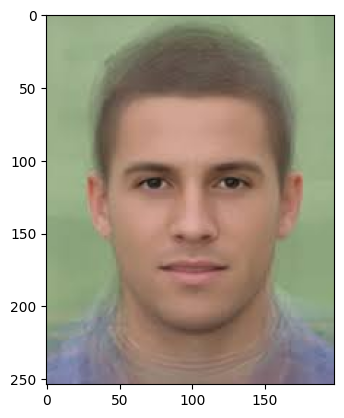

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1134.jpg')
imgplot = plt.imshow(img)
plt.show()


Image Processing

Resize the Images

Convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 58,  62,  63],
        [ 54,  58,  59],
        [ 50,  52,  52],
        ...,
        [ 73,  65,  52],
        [ 69,  61,  48],
        [ 74,  66,  53]],

       [[ 54,  58,  59],
        [ 51,  55,  56],
        [ 45,  49,  47],
        ...,
        [ 74,  66,  53],
        [ 71,  63,  50],
        [ 77,  69,  56]],

       [[ 49,  53,  54],
        [ 45,  49,  50],
        [ 41,  43,  43],
        ...,
        [ 76,  69,  56],
        [ 76,  68,  55],
        [ 82,  74,  61]],

       ...,

       [[ 20,  22,  19],
        [ 21,  23,  20],
        [ 21,  21,  19],
        ...,
        [171, 131,  82],
        [165, 124,  79],
        [154, 113,  68]],

       [[ 21,  23,  20],
        [ 22,  24,  21],
        [ 20,  22,  19],
        ...,
        [165, 124,  78],
        [160, 119,  75],
        [154, 113,  69]],

       [[ 20,  22,  19],
        [ 21,  23,  20],
        [ 20,  22,  19],
        ...,
        [166, 125,  79],
        [161, 120,  76],
        [152, 111,  67]]], dtype=uint8)
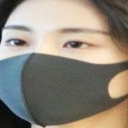

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.84705882, 0.84705882, 0.84705882],
        [0.84705882, 0.84705882, 0.84705882],
        [0.84705882, 0.84705882, 0.84705882],
        ...,
        [0.67058824, 0.67843137, 0.63921569],
        [0.67843137, 0.69411765, 0.66666667],
        [0.69803922, 0.7254902 , 0.69411765]],

       [[0.84705882, 0.84705882, 0.84705882],
        [0.84705882, 0.84705882, 0.84705882],
        [0.84705882, 0.84705882, 0.84705882],
        ...,
        [0.6745098 , 0.67843137, 0.64313725],
        [0.67843137, 0.69411765, 0.66666667],
        [0.69803922, 0.7254902 , 0.69411765]],

       [[0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039],
        ...,
        [0.6745098 , 0.68235294, 0.64313725],
        [0.67843137, 0.69411765, 0.66666667],
        [0.69803922, 0.7254902 , 0.69411765]],

       ...,

       [[0.74117647, 0.74901961, 0.70588235],
        [0.74509804, 0.75294118, 0.70980392],
        [0.74901961, 0

Building CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - acc: 0.6977 - loss: 0.6980 - val_acc: 0.9091 - val_loss: 0.2402
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - acc: 0.8811 - loss: 0.3050 - val_acc: 0.9157 - val_loss: 0.2174
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9051 - loss: 0.2502 - val_acc: 0.9058 - val_loss: 0.2274
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9161 - loss: 0.2092 - val_acc: 0.9190 - val_loss: 0.2203
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9284 - loss: 0.1890 - val_acc: 0.9107 - val_loss: 0.2440


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9128 - loss: 0.2337
Test Accuracy = 0.9172733426094055


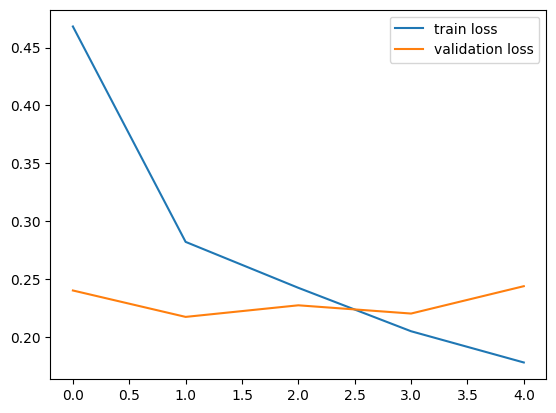

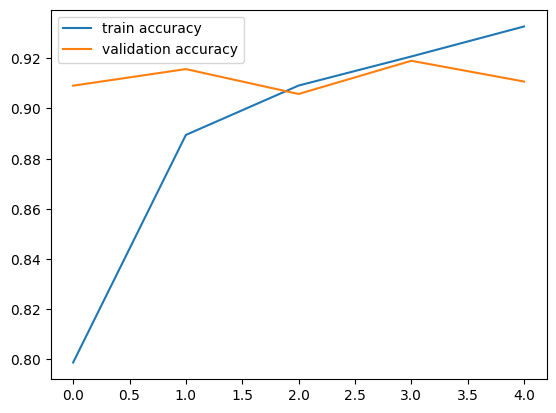

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


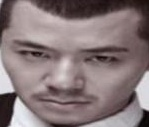

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.53557867 0.46638379]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if (input_pred_label == 0):

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_1005.jpg


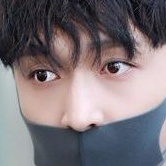

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.4396844 0.6688852]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if (input_pred_label == 0):

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')